Prediccion de generacion de energia con Regrecion lineal multiple

In [10]:
#Importacion de librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


In [11]:
# Cargar el dataset
datset_path = r"C:\Users\jhean\OneDrive\Documentos\Tareas\Inteligencia artificial\1erParcial\Dataset\EIA923_Cleaned_2020_2024.xlsx"
df = pd.read_excel(datset_path)
df.head()

,Plant_ID,Plant_Name,State,Fuel_Consumed_MMBtu,Net_Generation_MWh,Year
0,1,Sand Point,AK,3043,347.0,2020
1,2,Bankhead Dam,AL,1220102,139170.0,2020
2,3,Barry,AL,1243854,2633517.0,2020
3,3,Barry,AL,53006762,5084350.0,2020
4,3,Barry,AL,26188716,2625834.5,2020


In [12]:
# Variables predictoras
X = df[["Fuel_Consumed_MMBtu", "Year", "State"]]

# Codificacion con one-hot encoding
X = pd.get_dummies(X, columns=["State"], drop_first=True)

# Variable objetivo produccion neta de energia en MWh
y = df["Net_Generation_MWh"]

# Division prueba (80% / 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Entrenamiento: {X_train.shape[0]} registros")
print(f"Prueba: {X_test.shape[0]} registros")


Entrenamiento: 57524 registros
Prueba: 14382 registros


In [ ]:
#Normalizacion de los datos
scaler = StandardScaler()#Este escalador resata la media y divide por la desviacion estandar de cada columna normalizando los datos
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)
#Convertir a DataFrame
X_train_norm_df = pd.DataFrame(X_train_norm, columns=X.columns, index=X_train.index)
X_test_norm_df = pd.DataFrame(X_test_norm, columns=X.columns, index=X_test.index)

print("X_train normalizado:")
display(X_train_norm_df.head())

print("X_test normalizado:")
display(X_test_norm_df.head())


X_train normalizado:


,Fuel_Consumed_MMBtu,Year,State_AL,State_AR,State_AZ,State_CA,State_CO,State_CT,State_DC,State_DE,...,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY
54801,-0.120386,0.924763,-0.105567,-0.087694,-0.120329,-0.367361,-0.142383,-0.12305,-0.027667,-0.063497,...,-0.064863,-0.090762,-0.253445,-0.095046,-0.144966,-0.088695,-0.115246,-0.149465,-0.063221,-0.079358
37200,-0.239637,0.151755,-0.105567,-0.087694,-0.120329,-0.367361,-0.142383,-0.12305,-0.027667,-0.063497,...,-0.064863,-0.090762,-0.253445,-0.095046,-0.144966,-0.088695,-0.115246,-0.149465,-0.063221,-0.079358
41685,-0.187385,0.151755,-0.105567,-0.087694,-0.120329,-0.367361,-0.142383,-0.12305,-0.027667,-0.063497,...,-0.064863,-0.090762,-0.253445,-0.095046,-0.144966,-0.088695,-0.115246,-0.149465,-0.063221,-0.079358
1551,-0.239616,-1.394259,-0.105567,-0.087694,-0.120329,-0.367361,-0.142383,-0.12305,-0.027667,-0.063497,...,-0.064863,-0.090762,-0.253445,-0.095046,-0.144966,-0.088695,-0.115246,-0.149465,-0.063221,-0.079358
1970,-0.239633,-1.394259,-0.105567,-0.087694,-0.120329,-0.367361,-0.142383,-0.12305,-0.027667,-0.063497,...,-0.064863,-0.090762,-0.253445,-0.095046,-0.144966,-0.088695,-0.115246,-0.149465,-0.063221,-0.079358


X_test normalizado:


,Fuel_Consumed_MMBtu,Year,State_AL,State_AR,State_AZ,State_CA,State_CO,State_CT,State_DC,State_DE,...,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY
25855,-0.065424,-0.621252,-0.105567,-0.087694,-0.120329,-0.367361,-0.142383,-0.12305,-0.027667,-0.063497,...,-0.064863,-0.090762,3.945627,-0.095046,-0.144966,-0.088695,-0.115246,-0.149465,-0.063221,-0.079358
8533,-0.238935,-1.394259,-0.105567,-0.087694,-0.120329,-0.367361,-0.142383,-0.12305,-0.027667,-0.063497,...,-0.064863,-0.090762,-0.253445,-0.095046,-0.144966,-0.088695,-0.115246,-0.149465,-0.063221,-0.079358
48125,0.416762,0.924763,-0.105567,-0.087694,-0.120329,-0.367361,-0.142383,-0.12305,-0.027667,-0.063497,...,-0.064863,-0.090762,-0.253445,-0.095046,-0.144966,-0.088695,-0.115246,-0.149465,-0.063221,-0.079358
57892,0.204648,0.924763,-0.105567,-0.087694,-0.120329,-0.367361,-0.142383,-0.12305,-0.027667,-0.063497,...,-0.064863,-0.090762,-0.253445,-0.095046,-0.144966,-0.088695,-0.115246,-0.149465,-0.063221,-0.079358
33629,-0.051744,0.151755,-0.105567,-0.087694,-0.120329,-0.367361,-0.142383,-0.12305,-0.027667,-0.063497,...,-0.064863,-0.090762,-0.253445,10.521268,-0.144966,-0.088695,-0.115246,-0.149465,-0.063221,-0.079358


In [14]:
# Añadir la columna de 1s al inicio (intercepto)
X_train_intercept = np.c_[np.ones((X_train_norm.shape[0], 1)), X_train_norm]
X_test_intercept = np.c_[np.ones((X_test_norm.shape[0], 1)), X_test_norm]
#mostrar (opcional)
intercept_column = ["Intercept"]
column_names = intercept_column + list(X.columns)

X_train_intercept_df = pd.DataFrame(X_train_intercept, columns=column_names, index=X_train.index)
X_test_intercept_df = pd.DataFrame(X_test_intercept, columns=column_names, index=X_test.index)

print("X_train con columna de intercepto añadida:")
display(X_train_intercept_df.head())

print("X_test con columna de intercepto añadida:")
display(X_test_intercept_df.head())


X_train con columna de intercepto añadida:


,Intercept,Fuel_Consumed_MMBtu,Year,State_AL,State_AR,State_AZ,State_CA,State_CO,State_CT,State_DC,...,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY
54801,1.0,-0.120386,0.924763,-0.105567,-0.087694,-0.120329,-0.367361,-0.142383,-0.12305,-0.027667,...,-0.064863,-0.090762,-0.253445,-0.095046,-0.144966,-0.088695,-0.115246,-0.149465,-0.063221,-0.079358
37200,1.0,-0.239637,0.151755,-0.105567,-0.087694,-0.120329,-0.367361,-0.142383,-0.12305,-0.027667,...,-0.064863,-0.090762,-0.253445,-0.095046,-0.144966,-0.088695,-0.115246,-0.149465,-0.063221,-0.079358
41685,1.0,-0.187385,0.151755,-0.105567,-0.087694,-0.120329,-0.367361,-0.142383,-0.12305,-0.027667,...,-0.064863,-0.090762,-0.253445,-0.095046,-0.144966,-0.088695,-0.115246,-0.149465,-0.063221,-0.079358
1551,1.0,-0.239616,-1.394259,-0.105567,-0.087694,-0.120329,-0.367361,-0.142383,-0.12305,-0.027667,...,-0.064863,-0.090762,-0.253445,-0.095046,-0.144966,-0.088695,-0.115246,-0.149465,-0.063221,-0.079358
1970,1.0,-0.239633,-1.394259,-0.105567,-0.087694,-0.120329,-0.367361,-0.142383,-0.12305,-0.027667,...,-0.064863,-0.090762,-0.253445,-0.095046,-0.144966,-0.088695,-0.115246,-0.149465,-0.063221,-0.079358


X_test con columna de intercepto añadida:


,Intercept,Fuel_Consumed_MMBtu,Year,State_AL,State_AR,State_AZ,State_CA,State_CO,State_CT,State_DC,...,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY
25855,1.0,-0.065424,-0.621252,-0.105567,-0.087694,-0.120329,-0.367361,-0.142383,-0.12305,-0.027667,...,-0.064863,-0.090762,3.945627,-0.095046,-0.144966,-0.088695,-0.115246,-0.149465,-0.063221,-0.079358
8533,1.0,-0.238935,-1.394259,-0.105567,-0.087694,-0.120329,-0.367361,-0.142383,-0.12305,-0.027667,...,-0.064863,-0.090762,-0.253445,-0.095046,-0.144966,-0.088695,-0.115246,-0.149465,-0.063221,-0.079358
48125,1.0,0.416762,0.924763,-0.105567,-0.087694,-0.120329,-0.367361,-0.142383,-0.12305,-0.027667,...,-0.064863,-0.090762,-0.253445,-0.095046,-0.144966,-0.088695,-0.115246,-0.149465,-0.063221,-0.079358
57892,1.0,0.204648,0.924763,-0.105567,-0.087694,-0.120329,-0.367361,-0.142383,-0.12305,-0.027667,...,-0.064863,-0.090762,-0.253445,-0.095046,-0.144966,-0.088695,-0.115246,-0.149465,-0.063221,-0.079358
33629,1.0,-0.051744,0.151755,-0.105567,-0.087694,-0.120329,-0.367361,-0.142383,-0.12305,-0.027667,...,-0.064863,-0.090762,-0.253445,10.521268,-0.144966,-0.088695,-0.115246,-0.149465,-0.063221,-0.079358


In [15]:
# Convertir a numpy arrays
X_train_np = X_train_intercept_df.values
X_test_np = X_test_intercept_df.values
y_train_np = y_train.values
y_test_np = y_test.values

# Verificacion de formas
print("Formas de los conjuntos para entrenamiento:")
print("X_train:", X_train_np.shape)
print("y_train:", y_train_np.shape)
print("X_test:", X_test_np.shape)
print("y_test:", y_test_np.shape)


Formas de los conjuntos para entrenamiento:
X_train: (57524, 53)
y_train: (57524,)
X_test: (14382, 53)
y_test: (14382,)


In [ ]:
#Asignamos a n el numero de caracteristicas inlcuyendo el intercepto
n = X_train_np.shape[1]
#Inicializar theta en ceros ya que si usamos valores grandes o aleatorios el algoritmo de descenso de gradiente puede converger lento o de forma inestable
theta = np.zeros(n)
#Definimos la hipotesis de la forma simplificada ya que theta esta en 0
def hypothesis(X, theta):
    return np.dot(X, theta)
#Funcion de costo basado en el error cuadratico medio (MSE).
def cost_function(X, y, theta):
    m = len(y)
    predictions = hypothesis(X, theta)
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost

In [ ]:
#Descenso de gradiente
def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    cost_history = []

    for i in range(iterations):
        h = hypothesis(X, theta)
        error = h - y
        gradient = (1 / m) * np.dot(X.T, error)
        theta = theta - alpha * gradient

        cost = cost_function(X, y, theta)
        cost_history.append(cost)

        if i % 100 == 0 or i == iterations - 1:
            print(f"Iteración {i}: Costo = {cost:.4f}")
            
    return theta, cost_history


In [50]:
alpha = 0.01
iterations = 1200

theta_final, cost_history = gradient_descent(X_train_np, y_train_np, theta, alpha, iterations)


Iteración 0: Costo = 631886290464.3077
Iteración 100: Costo = 130024045685.8516
Iteración 200: Costo = 64731749327.8911
Iteración 300: Costo = 55190778677.4361
Iteración 400: Costo = 53664842362.3602
Iteración 500: Costo = 53405551259.6310
Iteración 600: Costo = 53359739136.7642
Iteración 700: Costo = 53351359167.7140
Iteración 800: Costo = 53349699159.0888
Iteración 900: Costo = 53349264839.0691
Iteración 1000: Costo = 53349058797.7669
Iteración 1100: Costo = 53348898329.6335
Iteración 1199: Costo = 53348751167.6679


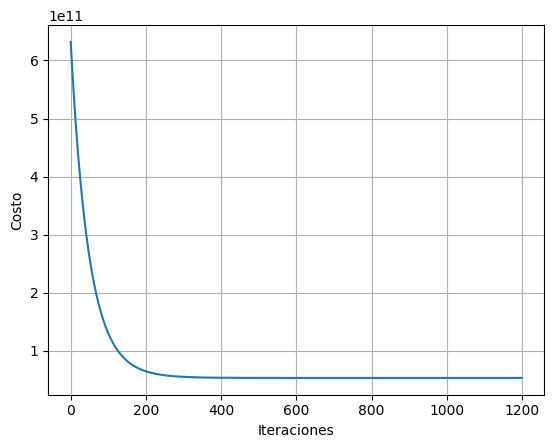

In [51]:
plt.plot(range(len(cost_history)), cost_history)
plt.xlabel("Iteraciones")
plt.ylabel("Costo")
plt.grid(True)
plt.show()


In [58]:
# Predicciones con el modelo entrenado
y_pred_test = hypothesis(X_test_np, theta_final) #predicciones con el conjunto de prueba y theta_final (theta optimizado)

# Metricas de evaluacion
mse_test = mean_squared_error(y_test_np, y_pred_test) #Error cuadratico medio (MSE) entre las predicciones y los valores reales
r2 = r2_score(y_test_np, y_pred_test) #Indica que tanto de varianza esta explicada por el modelo

print(f"MSE en el conjunto de prueba: {mse_test:.2f}")
print(f"R^2 Puntaje en el conjunto de prueba: {r2:.4f}")


MSE en el conjunto de prueba: 113094694089.00
R^2 Puntaje en el conjunto de prueba: 0.9059


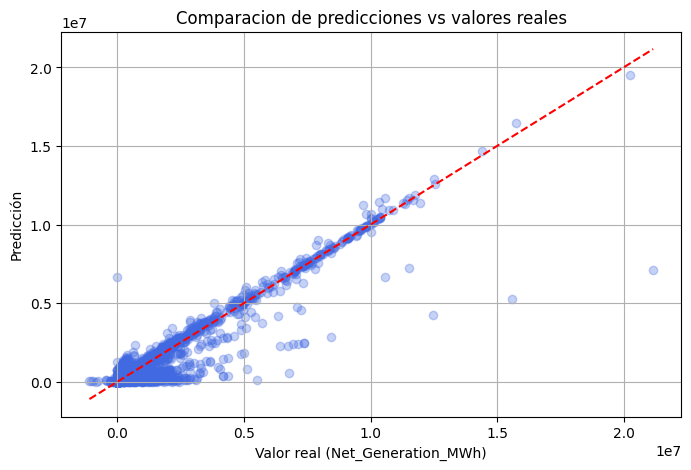

In [59]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test_np, y_pred_test, alpha=0.3, color='royalblue')
plt.plot([y_test_np.min(), y_test_np.max()], [y_test_np.min(), y_test_np.max()], color='red', linestyle='--')
plt.xlabel("Valor real (Net_Generation_MWh)")
plt.ylabel("Predicción")
plt.title("Comparacion de predicciones vs valores reales")
plt.grid(True)
plt.show()
